<a href="https://colab.research.google.com/github/RiseAboveAll/SVHN_ANN/blob/main/SVHN_Convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import load_model, clone_model, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adagrad,Adam,SGD,RMSprop,Adamax
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard,Callback,LearningRateScheduler,ModelCheckpoint
from math import pi, cos, floor
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.keras.backend.clear_session()

# Load Data

In [ ]:
hf=h5py.File('/content/drive/MyDrive/Projects/SVHN/SVHN_single_grey1.h5','r')
X_train = hf['X_train'][:]
y_train1 = hf['y_train'][:]
X_test = hf['X_test'][:]
y_test1 = hf['y_test'][:]
# Close this file
hf.close()

In [ ]:
X_train.shape

(42000, 32, 32)

# Reshape Data


In [ ]:
img_rows,img_cols,num_channels=32,32,1
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,num_channels)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,num_channels)

# One-Hot Target Variable

In [ ]:
y_train=to_categorical(y_train1)
y_test=to_categorical(y_test1)

# Normalize Data

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train/=255.0
X_test/=255.0

# Split Data

In [ ]:
X_train.shape

(42000, 32, 32, 1)

In [ ]:
x_train=X_train[:30000]
x_val=X_train[30000:]
Y_train=y_train[:30000]
Y_val=y_train[30000:]

# Define Input Shape

In [ ]:
input_shape=(img_rows,img_cols,num_channels)
num_classes=Y_train.shape[1]

In [ ]:
num_classes

10

# Model 1A - Following LeNet Architecture (Modified)

- Instead of 5X5 kernel filters , used 3X3 

- Used only Single Dense Layer

In [ ]:
input_layer=Input(shape=input_shape)
conv_layer_1=Conv2D(8,kernel_size=(3,3),padding='same')(input_layer)
pool_layer_1=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_1)
conv_layer_2=Conv2D(16,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_1)
pool_layer_2=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_2)
conv_layer_3=Conv2D(32,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_2)
pool_layer_3=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_3)
flat_1=Flatten()(pool_layer_3)
hidden_layer_1=Dense(1024,kernel_initializer='he_uniform',activation='relu')(flat_1)
output=Dense(num_classes,kernel_initializer='he_uniform',activation='softmax')(hidden_layer_1)
model=Model(inputs=input_layer,outputs=output)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 32)          0   

In [ ]:
optimizer=Adam(learning_rate=1e-5)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=model.fit(x_train,Y_train,validation_data=(x_val,Y_val),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
938/938 [==============================] - 7s 7ms/step - loss: 2.3015 - accuracy: 0.1098 - val_loss: 2.2945 - val_accuracy: 0.1507
Epoch 2/100
938/938 [==============================] - 6s 6ms/step - loss: 2.2896 - accuracy: 0.1643 - val_loss: 2.2758 - val_accuracy: 0.2393
Epoch 3/100
938/938 [==============================] - 6s 6ms/step - loss: 2.2707 - accuracy: 0.2400 - val_loss: 2.2549 - val_accuracy: 0.2111
Epoch 4/100
938/938 [==============================] - 6s 6ms/step - loss: 2.2453 - accuracy: 0.2853 - val_loss: 2.2241 - val_accuracy: 0.2942
Epoch 5/100
938/938 [==============================] - 6s 6ms/step - loss: 2.2118 - accuracy: 0.3458 - val_loss: 2.1793 - val_accuracy: 0.3559
Epoch 6/100
938/938 [==============================] - 6s 6ms/step - loss: 2.1638 - accuracy: 0.3809 - val_loss: 2.1231 - val_accuracy: 0.4032
Epoch 7/100
938/938 [==============================] - 6s 6ms/step - loss: 2.1072 - accuracy: 0.4178 - val_loss: 2.0588 - val_accuracy: 0.4316

Minimum validation loss: 0.5860321521759033


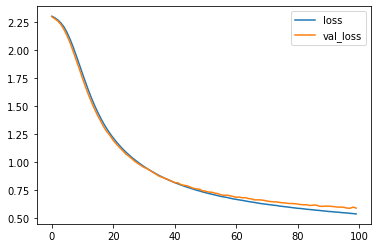

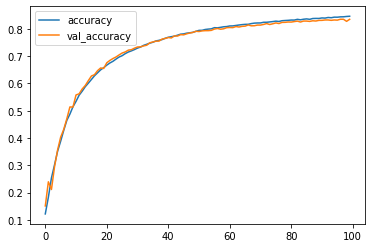

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
model.evaluate(X_test,y_test)
model.evaluate(x_val,Y_val)

model.evaluate(x_train , Y_train)

938/938 [==============================] - 4s 4ms/step - loss: 0.5324 - accuracy: 0.8476


[0.5323991179466248, 0.847599983215332]

# Model 1B Modified LeNet Architecture with BatchNormalization

In [ ]:
input_layer=Input(shape=input_shape)
conv_layer_1=Conv2D(8,kernel_size=(3,3),padding='same')(input_layer)
batch_norm_1=BatchNormalization()(conv_layer_1)
activation_layer_1=Activation('relu')(batch_norm_1)
pool_layer_1=MaxPooling2D(pool_size=(2,2),strides=2)(activation_layer_1)
conv_layer_2=Conv2D(16,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_1)
pool_layer_2=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_2)
conv_layer_3=Conv2D(32,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_2)
pool_layer_3=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_3)
flat_1=Flatten()(pool_layer_3)
hidden_layer_1=Dense(1024,kernel_initializer='he_uniform',activation='relu')(flat_1)
output=Dense(num_classes,kernel_initializer='he_uniform',activation='softmax')(hidden_layer_1)
model=Model(inputs=input_layer,outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 8)         32        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0     

In [ ]:
optimizer=Adam(learning_rate=1e-5)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
history=model.fit(x_train,Y_train,validation_data=(x_val,Y_val),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
938/938 [==============================] - 37s 5ms/step - loss: 2.3458 - accuracy: 0.1052 - val_loss: 2.2707 - val_accuracy: 0.1513
Epoch 2/100
938/938 [==============================] - 4s 4ms/step - loss: 2.2536 - accuracy: 0.1718 - val_loss: 2.1994 - val_accuracy: 0.2510
Epoch 3/100
938/938 [==============================] - 4s 4ms/step - loss: 2.1768 - accuracy: 0.2630 - val_loss: 2.0954 - val_accuracy: 0.3249
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 2.0663 - accuracy: 0.3503 - val_loss: 1.9467 - val_accuracy: 0.4296
Epoch 5/100
938/938 [==============================] - 4s 4ms/step - loss: 1.9105 - accuracy: 0.4391 - val_loss: 1.7701 - val_accuracy: 0.4890
Epoch 6/100
938/938 [==============================] - 4s 4ms/step - loss: 1.7329 - accuracy: 0.5088 - val_loss: 1.6021 - val_accuracy: 0.5477
Epoch 7/100
938/938 [==============================] - 4s 4ms/step - loss: 1.5638 - accuracy: 0.5609 - val_loss: 1.4504 - val_accuracy: 0.587

Minimum validation loss: 0.4964812099933624


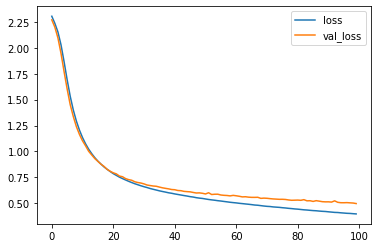

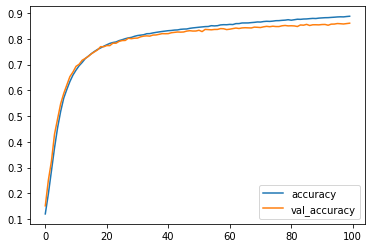

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.evaluate(X_test,y_test)
model.evaluate(x_val,Y_val)

model.evaluate(x_train , Y_train)

938/938 [==============================] - 3s 3ms/step - loss: 0.3868 - accuracy: 0.8908


[0.38680627942085266, 0.8907999992370605]

# Model 1C Modiefied Model 1B with ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [ ]:
input_layer=Input(shape=input_shape)
conv_layer_1=Conv2D(8,kernel_size=(3,3),padding='same')(input_layer)
batch_norm_1=BatchNormalization()(conv_layer_1)
activation_layer_1=Activation('relu')(batch_norm_1)
pool_layer_1=MaxPooling2D(pool_size=(2,2),strides=2)(activation_layer_1)
conv_layer_2=Conv2D(16,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_1)
pool_layer_2=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_2)
conv_layer_3=Conv2D(32,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_2)
pool_layer_3=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_3)
flat_1=Flatten()(pool_layer_3)
hidden_layer_1=Dense(1024,kernel_initializer='he_uniform',activation='relu')(flat_1)
output=Dense(num_classes,kernel_initializer='he_uniform',activation='softmax')(hidden_layer_1)
model=Model(inputs=input_layer,outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 8)         32        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0     

In [ ]:
os.chdir('/content/drive/MyDrive/Projects/SVHN/Convolution_Checkpoints')

In [ ]:
optimizer=Adam(learning_rate=1e-5,amsgrad=True)
#lr_schedule = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = EarlyStopping(patience=8)
model_checkpoint = ModelCheckpoint(
                   '/content/drive/MyDrive/Projects/SVHN/Convolution_Checkpoints/best_cnn.h5', 
                   save_best_only=True)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
#history=model.fit(x_train,Y_train,validation_data=(x_val,Y_val),epochs=100,batch_size=32,verbose=1)
history = model.fit(datagen.flow(x_train, Y_train, batch_size=32),
                              epochs=100, validation_data=(x_val, Y_val),
                              callbacks=[early_stopping,model_checkpoint])

Epoch 1/100
938/938 [==============================] - 11s 12ms/step - loss: 2.3560 - accuracy: 0.1085 - val_loss: 2.2506 - val_accuracy: 0.1947
Epoch 2/100
938/938 [==============================] - 11s 11ms/step - loss: 2.2410 - accuracy: 0.1885 - val_loss: 2.1651 - val_accuracy: 0.2618
Epoch 3/100
938/938 [==============================] - 11s 11ms/step - loss: 2.1646 - accuracy: 0.2619 - val_loss: 2.0459 - val_accuracy: 0.3499
Epoch 4/100
938/938 [==============================] - 11s 11ms/step - loss: 2.0544 - accuracy: 0.3370 - val_loss: 1.8962 - val_accuracy: 0.4298
Epoch 5/100
938/938 [==============================] - 11s 11ms/step - loss: 1.9224 - accuracy: 0.3932 - val_loss: 1.7420 - val_accuracy: 0.4857
Epoch 6/100
938/938 [==============================] - 11s 11ms/step - loss: 1.7916 - accuracy: 0.4463 - val_loss: 1.6033 - val_accuracy: 0.5251
Epoch 7/100
938/938 [==============================] - 11s 12ms/step - loss: 1.6682 - accuracy: 0.4867 - val_loss: 1.4794 - val_ac

Minimum validation loss: 0.47955936193466187


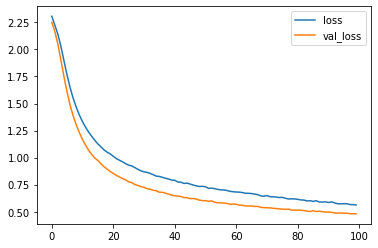

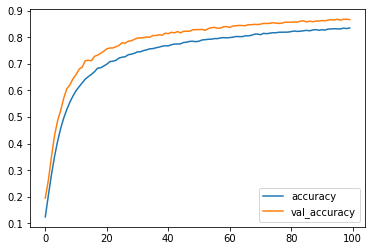

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
model.evaluate(X_test,y_test)
model.evaluate(x_val,Y_val)

model.evaluate(x_train , Y_train)

938/938 [==============================] - 3s 3ms/step - loss: 0.4363 - accuracy: 0.8769


[0.4362945258617401, 0.8769333362579346]

# Model 1D Modified Model 1C with Increased Filters

In [ ]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [ ]:
input_layer=Input(shape=input_shape)
conv_layer_1=Conv2D(16,kernel_size=(3,3),padding='same')(input_layer)
batch_norm_1=BatchNormalization()(conv_layer_1)
activation_layer_1=Activation('relu')(batch_norm_1)
pool_layer_1=MaxPooling2D(pool_size=(2,2),strides=2)(activation_layer_1)
conv_layer_2=Conv2D(32,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_1)
pool_layer_2=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_2)
conv_layer_3=Conv2D(64,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_2)
pool_layer_3=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_3)
flat_1=Flatten()(pool_layer_3)
hidden_layer_1=Dense(1024,kernel_initializer='he_uniform',activation='relu')(flat_1)
output=Dense(num_classes,kernel_initializer='he_uniform',activation='softmax')(hidden_layer_1)
model=Model(inputs=input_layer,outputs=output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0   

In [ ]:
optimizer=Adam(learning_rate=1e-5,amsgrad=True)
#lr_schedule = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = EarlyStopping(patience=8)
model_checkpoint = ModelCheckpoint(
                   '/content/drive/MyDrive/Projects/SVHN/Convolution_Checkpoints/best_cnn.h5', 
                   save_best_only=True)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
#history=model.fit(x_train,Y_train,validation_data=(x_val,Y_val),epochs=100,batch_size=32,verbose=1)
history = model.fit(datagen.flow(x_train, Y_train, batch_size=32),
                              epochs=100, validation_data=(x_val, Y_val),
                              callbacks=[early_stopping,model_checkpoint])

Epoch 1/100
938/938 [==============================] - 12s 12ms/step - loss: 2.3026 - accuracy: 0.1208 - val_loss: 2.2359 - val_accuracy: 0.2023
Epoch 2/100
938/938 [==============================] - 11s 12ms/step - loss: 2.2205 - accuracy: 0.2273 - val_loss: 2.1248 - val_accuracy: 0.3043
Epoch 3/100
938/938 [==============================] - 11s 12ms/step - loss: 2.0983 - accuracy: 0.3378 - val_loss: 1.9355 - val_accuracy: 0.4362
Epoch 4/100
938/938 [==============================] - 11s 12ms/step - loss: 1.9240 - accuracy: 0.4222 - val_loss: 1.7209 - val_accuracy: 0.5047
Epoch 5/100
938/938 [==============================] - 11s 12ms/step - loss: 1.7308 - accuracy: 0.5030 - val_loss: 1.5103 - val_accuracy: 0.5955
Epoch 6/100
938/938 [==============================] - 11s 12ms/step - loss: 1.5519 - accuracy: 0.5655 - val_loss: 1.3468 - val_accuracy: 0.6382
Epoch 7/100
938/938 [==============================] - 11s 12ms/step - loss: 1.4091 - accuracy: 0.6031 - val_loss: 1.2142 - val_ac

Minimum validation loss: 0.40849819779396057


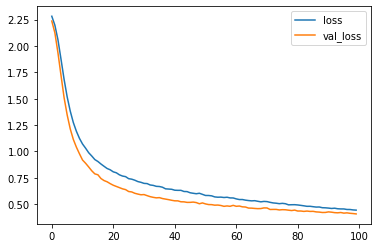

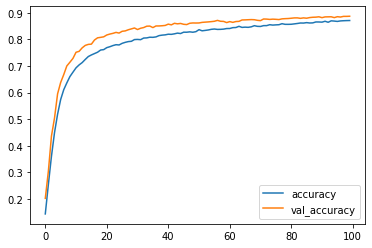

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
model.evaluate(X_test,y_test)
model.evaluate(x_val,Y_val)

model.evaluate(x_train , Y_train)

938/938 [==============================] - 3s 3ms/step - loss: 0.3294 - accuracy: 0.9097


[0.3294128477573395, 0.9096666574478149]

# Model 1E Modified Model 1D by Increasing Hidden Layer and Reduced no of Neurons

In [ ]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [ ]:
input_layer=Input(shape=input_shape)
conv_layer_1=Conv2D(16,kernel_size=(3,3),padding='same')(input_layer)
batch_norm_1=BatchNormalization()(conv_layer_1)
activation_layer_1=Activation('relu')(batch_norm_1)
pool_layer_1=MaxPooling2D(pool_size=(2,2),strides=2)(activation_layer_1)
conv_layer_2=Conv2D(32,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_1)
pool_layer_2=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_2)
conv_layer_3=Conv2D(64,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_2)
pool_layer_3=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_3)
flat_1=Flatten()(pool_layer_3)
hidden_layer_1=Dense(120,kernel_initializer='he_uniform',activation='relu')(flat_1)
hidden_layer_2=Dense(84,kernel_initializer='he_uniform',activation='relu')(hidden_layer_1)
output=Dense(num_classes,kernel_initializer='he_uniform',activation='softmax')(hidden_layer_2)
model=Model(inputs=input_layer,outputs=output)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0   

In [ ]:
optimizer=Adam(learning_rate=1e-5,amsgrad=True)
#lr_schedule = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = EarlyStopping(patience=8)
model_checkpoint = ModelCheckpoint(
                   '/content/drive/MyDrive/Projects/SVHN/Convolution_Checkpoints/best_cnn.h5', 
                   save_best_only=True)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
#history=model.fit(x_train,Y_train,validation_data=(x_val,Y_val),epochs=100,batch_size=32,verbose=1)
history = model.fit(datagen.flow(x_train, Y_train, batch_size=32),
                              epochs=100, validation_data=(x_val, Y_val),
                              callbacks=[early_stopping,model_checkpoint])

Epoch 1/100
938/938 [==============================] - 11s 12ms/step - loss: 2.3357 - accuracy: 0.1062 - val_loss: 2.2805 - val_accuracy: 0.1402
Epoch 2/100
938/938 [==============================] - 11s 11ms/step - loss: 2.2775 - accuracy: 0.1516 - val_loss: 2.2459 - val_accuracy: 0.1900
Epoch 3/100
938/938 [==============================] - 11s 11ms/step - loss: 2.2390 - accuracy: 0.1996 - val_loss: 2.1885 - val_accuracy: 0.2513
Epoch 4/100
938/938 [==============================] - 11s 12ms/step - loss: 2.1823 - accuracy: 0.2579 - val_loss: 2.0899 - val_accuracy: 0.3281
Epoch 5/100
938/938 [==============================] - 11s 12ms/step - loss: 2.0860 - accuracy: 0.3279 - val_loss: 1.9470 - val_accuracy: 0.3930
Epoch 6/100
938/938 [==============================] - 11s 11ms/step - loss: 1.9405 - accuracy: 0.4011 - val_loss: 1.7724 - val_accuracy: 0.4721
Epoch 7/100
938/938 [==============================] - 11s 11ms/step - loss: 1.7797 - accuracy: 0.4720 - val_loss: 1.5987 - val_ac

Minimum validation loss: 0.4289493262767792


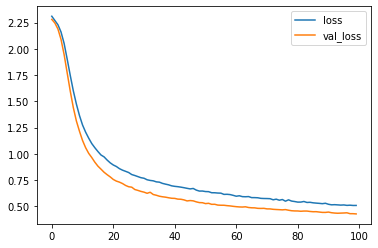

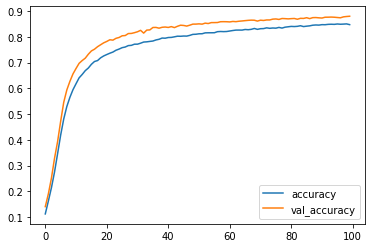

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
model.evaluate(X_test,y_test)
model.evaluate(x_val,Y_val)

model.evaluate(x_train , Y_train)

938/938 [==============================] - 2s 3ms/step - loss: 0.3850 - accuracy: 0.8922


[0.3850264847278595, 0.8921666741371155]

# Model 1F Increased Filters Further

In [ ]:
input_layer=Input(shape=input_shape)
conv_layer_1=Conv2D(32,kernel_size=(3,3),padding='same')(input_layer)
batch_norm_1=BatchNormalization()(conv_layer_1)
activation_layer_1=Activation('relu')(batch_norm_1)
pool_layer_1=MaxPooling2D(pool_size=(2,2),strides=2)(activation_layer_1)
conv_layer_2=Conv2D(64,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_1)
pool_layer_2=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_2)
conv_layer_3=Conv2D(128,kernel_size=(3,3),padding='same',activation='relu')(pool_layer_2)
pool_layer_3=MaxPooling2D(pool_size=(2,2),strides=2)(conv_layer_3)
flat_1=Flatten()(pool_layer_3)
hidden_layer_1=Dense(120,kernel_initializer='he_uniform',activation='relu')(flat_1)
hidden_layer_2=Dense(84,kernel_initializer='he_uniform',activation='relu')(hidden_layer_1)
output=Dense(num_classes,kernel_initializer='he_uniform',activation='softmax')(hidden_layer_2)
model=Model(inputs=input_layer,outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

In [ ]:
optimizer=Adam(learning_rate=1e-5,amsgrad=True)
#lr_schedule = LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 10))
early_stopping = EarlyStopping(patience=8)
model_checkpoint = ModelCheckpoint(
                   '/content/drive/MyDrive/Projects/SVHN/Convolution_Checkpoints/best_cnn.h5', 
                   save_best_only=True)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
#history=model.fit(x_train,Y_train,validation_data=(x_val,Y_val),epochs=100,batch_size=32,verbose=1)
history = model.fit(datagen.flow(x_train, Y_train, batch_size=32),
                              epochs=100, validation_data=(x_val, Y_val),
                              callbacks=[early_stopping,model_checkpoint])

Epoch 1/100
938/938 [==============================] - 12s 12ms/step - loss: 2.3016 - accuracy: 0.1116 - val_loss: 2.2398 - val_accuracy: 0.1908
Epoch 2/100
938/938 [==============================] - 11s 12ms/step - loss: 2.2236 - accuracy: 0.2045 - val_loss: 2.0952 - val_accuracy: 0.3332
Epoch 3/100
938/938 [==============================] - 11s 12ms/step - loss: 2.0710 - accuracy: 0.3300 - val_loss: 1.8361 - val_accuracy: 0.4553
Epoch 4/100
938/938 [==============================] - 11s 12ms/step - loss: 1.8190 - accuracy: 0.4484 - val_loss: 1.5285 - val_accuracy: 0.5660
Epoch 5/100
938/938 [==============================] - 11s 12ms/step - loss: 1.5536 - accuracy: 0.5482 - val_loss: 1.2940 - val_accuracy: 0.6361
Epoch 6/100
938/938 [==============================] - 11s 12ms/step - loss: 1.3542 - accuracy: 0.6102 - val_loss: 1.1320 - val_accuracy: 0.6853
Epoch 7/100
938/938 [==============================] - 11s 12ms/step - loss: 1.2066 - accuracy: 0.6553 - val_loss: 1.0059 - val_ac

Minimum validation loss: 0.3577238917350769


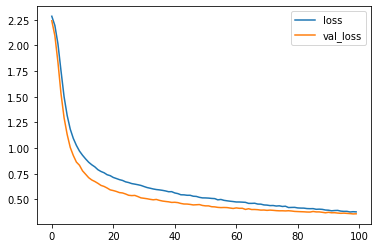

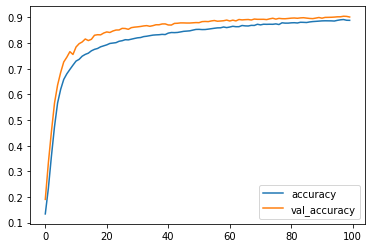

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
model.evaluate(X_test,y_test)
model.evaluate(x_val,Y_val)

model.evaluate(x_train , Y_train)

938/938 [==============================] - 3s 3ms/step - loss: 0.2732 - accuracy: 0.9234


[0.2732243239879608, 0.9234333038330078]

# Summary

- Model 1F - Train Acc : .92 ; Train Loss : .27
           - Val Acc   : .90 ; Val Loss   : .35
           - Test Acc  : .89 ; Test Loss  : .36

- Model 1E - Train Acc : .89 ; Train Loss : .38
           - Val Acc   : .88 ; Val Loss   : .42
           - Test Acc  : .87 ; Test Loss  : .43

- Model 1D - Train Acc : .90 ; Train Loss : .32
           - Val Acc   : .88 ; Val Loss   : .40
           - Test Acc  : .88 ; Test Loss  : .41

- Model 1C - Train Acc : .87 ; Train Loss : .43
           - Val Acc   : .86 ; Val Loss   : .47
           - Test Acc  : .86 ; Test Loss  : .48

- Model 1B - Train Acc : .89 ; Train Loss : .38
           - Val Acc   : .86 ; Val Loss   : .49
           - Test Acc  : .86 ; Test Loss  : .49

- Model 1A - Train Acc : .84 ; Train Loss : .53
           - Val Acc   : .83 ; Val Loss   : .58
           - Test Acc  : .83 ; Test Loss  : .58



- We see that Convolution with BatchNorm has faster convergence and increase in performance 

- We notice that increasing the filters we have increased the performance of the model

- Also, Increasing the hidden layers from 1 to 2 hidden layer with reduced neurons , increases the performance